In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
#number of rows to read
size = 20000
rod_df = pd.read_csv('data/311_rodent.csv')
vac_df = pd.read_csv('data/311_vacant.csv')
geo_df = gpd.read_file('data/chi_boundaries.geojson')

In [19]:
# Some preprocessing
vac_df.drop(['IS THE BUILDING DANGEROUS OR HAZARDOUS?'], axis = 1, inplace=True)
vac_df.dropna(inplace=True)
rod_df.dropna(inplace=True)
vac_df['zip'] = vac_df['ZIP CODE'].astype(int)
rod_df['zip'] = rod_df['ZIP Code'].astype(int)
geo_df['zip'] = geo_df['zip'].astype(int)

In [20]:
geo_df.head()

,objectid,shape_len,zip,shape_area,geometry
0,33,42720.0444058,60647,106052287.488,(POLYGON ((-87.67762151065281 41.9177578010629...
1,34,48103.7827213,60639,127476050.762,(POLYGON ((-87.72683253163021 41.9226462671259...
2,35,27288.6096123,60707,45069038.4783,(POLYGON ((-87.78500237831095 41.9091478547167...
3,36,42527.9896789,60622,70853834.3797,(POLYGON ((-87.6670686895295 41.88885188496992...
4,37,47970.1401531,60651,99039621.2518,(POLYGON ((-87.70655631674127 41.8955534069940...


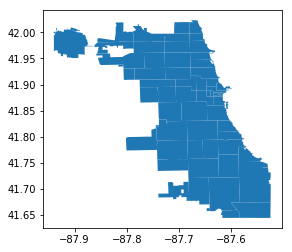

In [21]:
geo_df.plot()

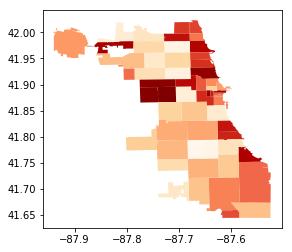

In [22]:
geo_df.plot(column = 'shape_area', cmap= 'OrRd')

In [23]:
# Get the counts
rod_zip_counts = rod_df.groupby('zip').count()
vac_zip_counts = vac_df.groupby('zip').count()
# Make a smaller dataframe with two columns: "zip" and "count"
r_zipcounts = pd.DataFrame({'zip': rod_zip_counts.index, 'count': rod_zip_counts['Status']})
v_zipcounts = pd.DataFrame({'zip': vac_zip_counts.index, 'count': vac_zip_counts['Ward']})
print(r_zipcounts.head())
print(v_zipcounts.head())

       count    zip
zip                
0          1      0
60601    221  60601
60602    115  60602
60603    116  60603
60604    135  60604
       count    zip
zip                
60601      3  60601
60604      1  60604
60605     15  60605
60606      1  60606
60607     27  60607


In [24]:
# Join them onto geo_df
rjoined = geo_df.join(r_zipcounts, on='zip', how='left', lsuffix='l', rsuffix='r')
vjoined = geo_df.join(v_zipcounts, on='zip', how='left', lsuffix='l', rsuffix='r')
# There is probably a cleaner way to do this, but I'll let you figure that out.

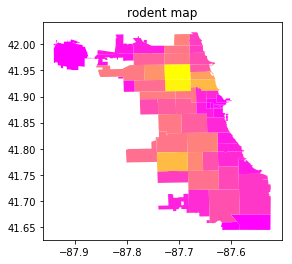

In [29]:
# Plot the map color coded by number of rodent 311 requests
rjoined.plot(column='count', cmap='spring')
plt.title('rodent map')
plt.show()

C:\Users\jesus\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


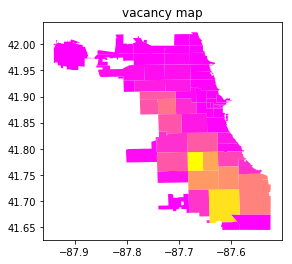

In [31]:
# Plot the map color coded by number of vacancy calls
vjoined.plot(column='count', cmap='spring')
plt.title('vacancy map')
plt.show()

In [32]:
rod_xy = rod_df[['Latitude', 'Longitude']]
vac_xy = vac_df[['LATITUDE', 'LONGITUDE']]

In [33]:
import folium
from folium.plugins import HeatMap

In [34]:
print(rod_xy.mean())
print(vac_xy.mean())

Latitude     41.880246
Longitude   -87.692200
dtype: float64
LATITUDE     41.792957
LONGITUDE   -87.662480
dtype: float64


In [35]:
hmap = folium.Map(location=[41.87, -87.69], zoom_start=10)
hm_rod = HeatMap(zip(rod_xy['Latitude'].values, rod_xy['Longitude'].values), radius=13, blur=20)
hmap.add_child(hm_rod)

In [36]:
hmap = folium.Map(location=[41.87, -87.69], zoom_start=10)
hm_rod = HeatMap(zip(vac_xy['LATITUDE'].values, vac_xy['LONGITUDE'].values), radius=14, blur=20)
hmap.add_child(hm_rod)